In [5]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
happiness = pd.read_csv('/content/drive/MyDrive/Colab/Happiness_report.csv')
happiness

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
mexico = happiness[happiness['Country or region'] == 'Mexico']
mexico.set_index('Country or region', inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


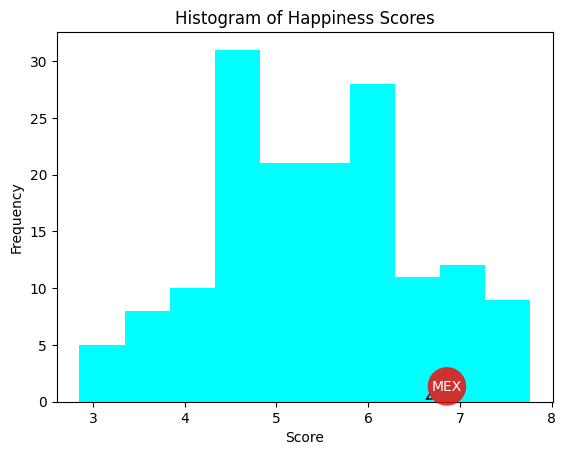

In [ ]:
plt.hist(happiness['Score'], bins=10, color='#00FFFF')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Happiness Scores')

mexico_score = mexico['Score'].values[0]

plt.annotate('MEX', xy=(mexico_score, 0), xytext=(mexico_score + 0.1, 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             bbox=dict(boxstyle='circle', facecolor=(1, 0, 0, 0.8), edgecolor='none'),
             color= 'white')

plt.show()


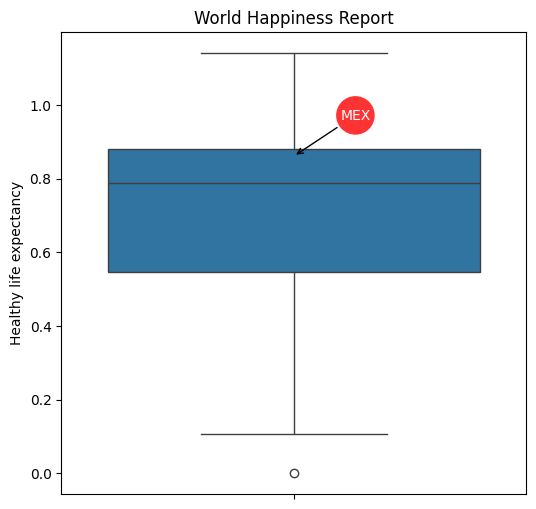

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=happiness['Healthy life expectancy'])
plt.title('World Happiness Report')

mexico_life_expectancy = mexico['Healthy life expectancy'].values[0]

plt.annotate('MEX', xy=(0, mexico_life_expectancy), xytext=(0.1, mexico_life_expectancy + 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             bbox=dict(boxstyle='circle', facecolor=(1, 0, 0, 0.8), edgecolor='none'),
             color= 'white')

plt.show()


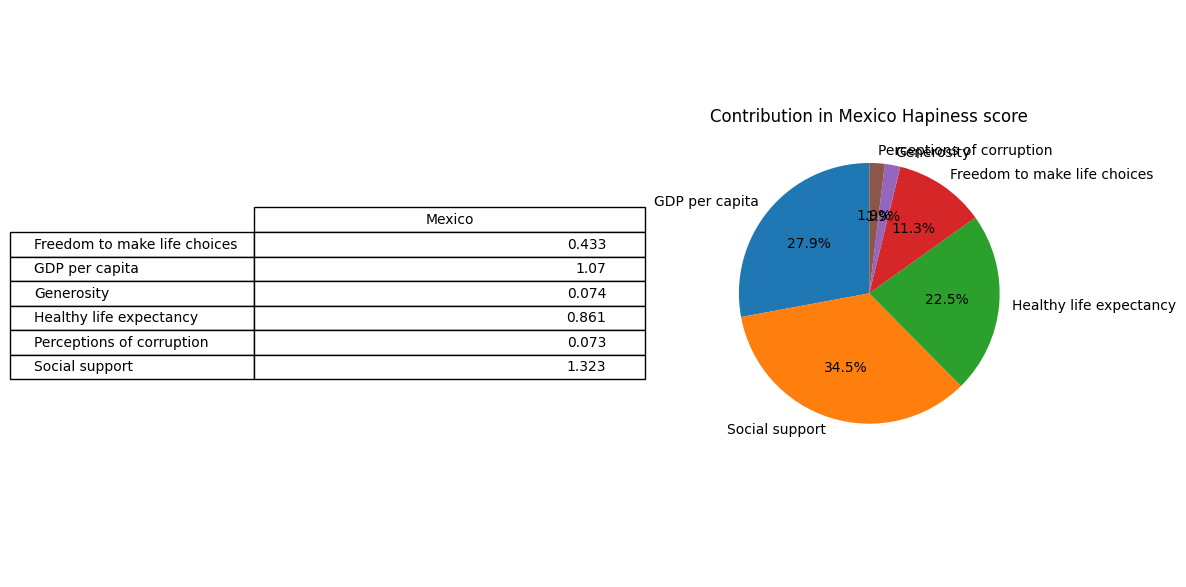

In [ ]:
mexico_melted = pd.melt(mexico.reset_index(), id_vars='Country or region', value_vars=mexico.columns[2:])
mexico_melted.columns = ['Country', 'Factor', 'Value']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax2.pie(mexico_melted['Value'], labels=mexico_melted['Factor'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Contribution in Mexico Hapiness score')

table_data = mexico_melted.pivot(index='Factor', columns='Country', values='Value')
ax1.axis('off')
table = ax1.table(cellText=table_data.values, colLabels=table_data.columns, rowLabels=table_data.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.show()


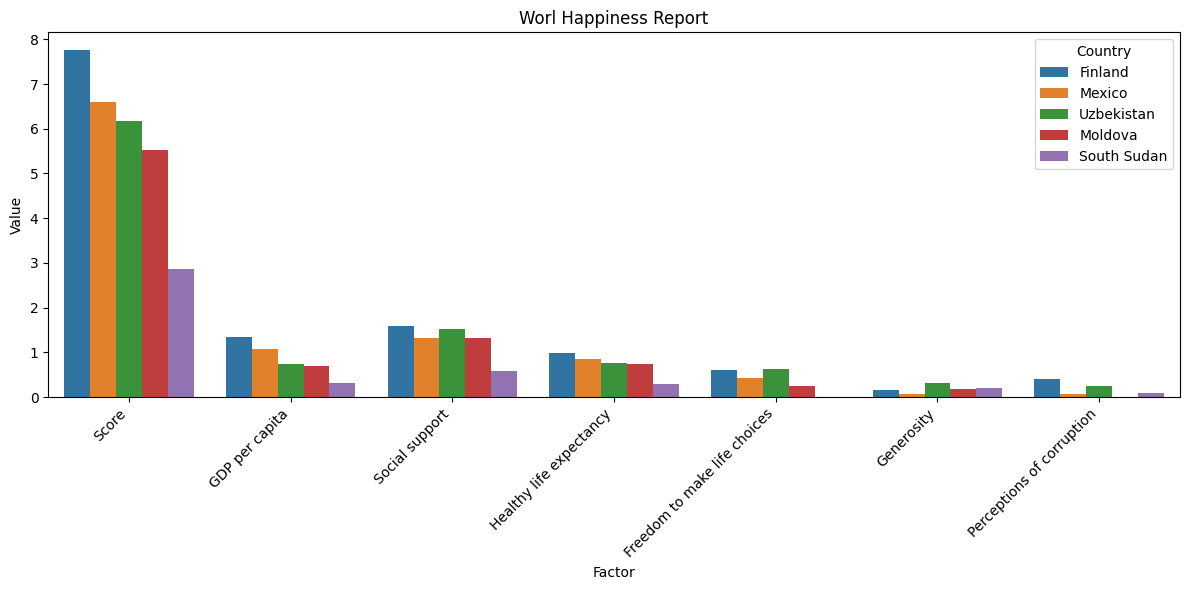

In [ ]:
happiest = happiness.loc[happiness['Score'].idxmax()]
least_happy = happiness.loc[happiness['Score'].idxmin()]
most_freedom = happiness.loc[happiness['Freedom to make life choices'].idxmax()]
least_corruption = happiness.loc[happiness['Perceptions of corruption'].idxmin()]

countries_to_keep = ['Mexico', happiest['Country or region'], least_happy['Country or region'],
                     most_freedom['Country or region'], least_corruption['Country or region']]
filtered_happiness = happiness[happiness['Country or region'].isin(countries_to_keep)]

filtered_melted = pd.melt(filtered_happiness, id_vars='Country or region', value_vars=filtered_happiness.columns[2:])
filtered_melted.columns = ['Country', 'Factor', 'Value']

plt.figure(figsize=(12, 6))
sns.barplot(x='Factor', y='Value', hue='Country', data=filtered_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Worl Happiness Report')
plt.tight_layout()
plt.show()


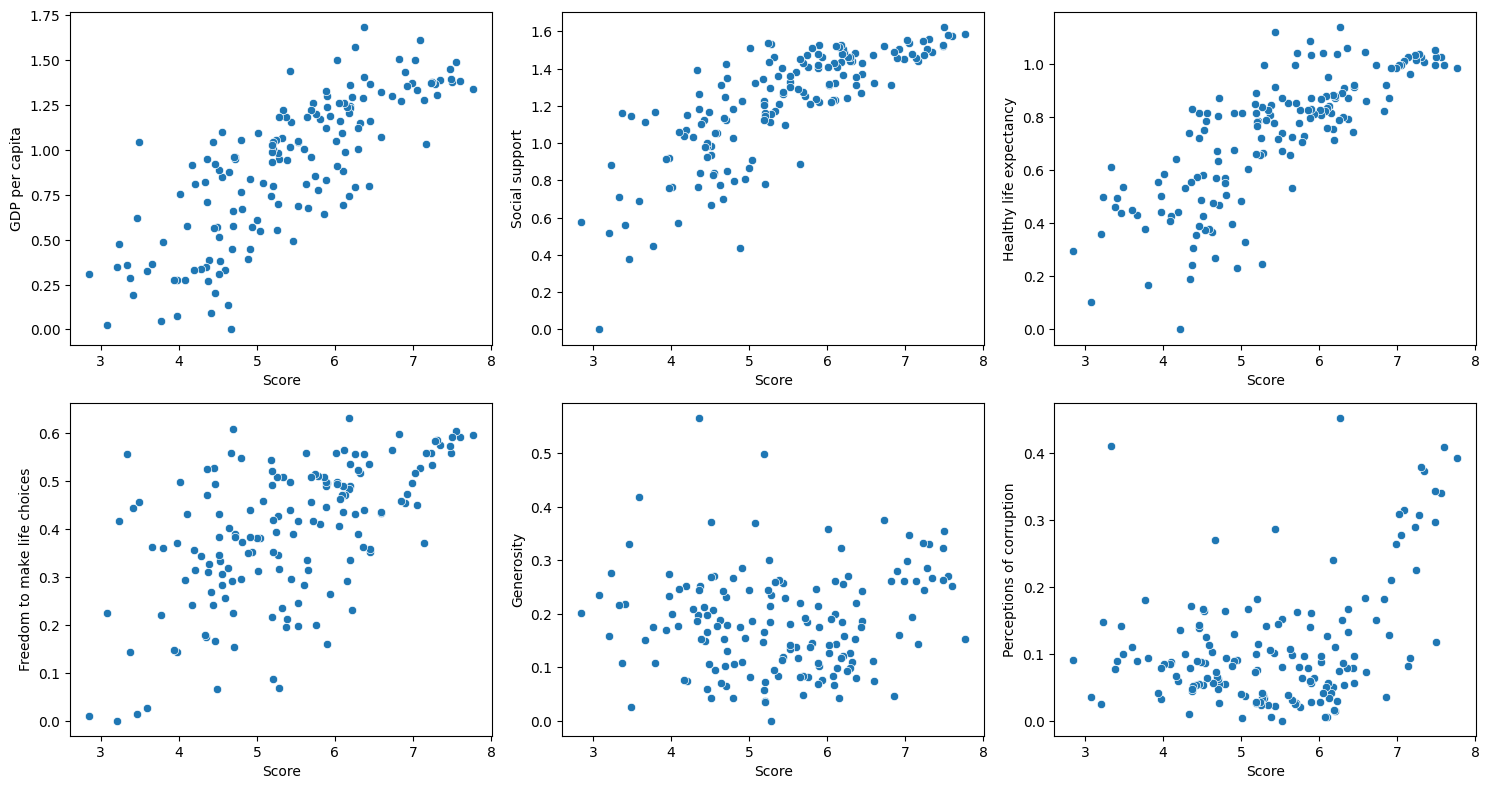

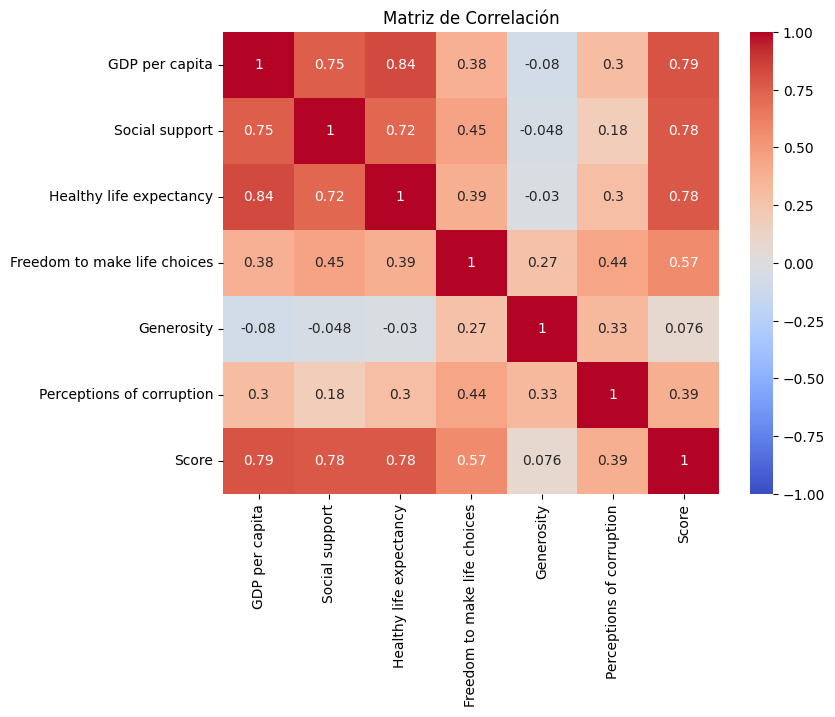

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

for i, factor in enumerate(factors):
  row = i // 3
  col = i % 3
  sns.scatterplot(x='Score', y=factor, data=happiness, ax=axes[row, col])

plt.tight_layout()
plt.show()

corr_matrix = happiness[factors + ['Score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-11-a9560629ea58>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Score', data=region_happiness, palette='viridis')


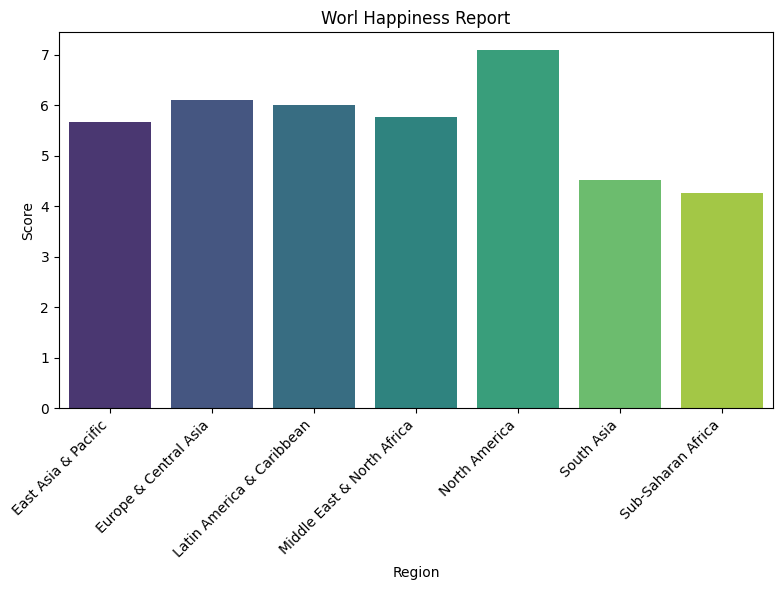

In [11]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
happiness = pd.read_csv('/content/drive/MyDrive/Colab/Happiness_report.csv')
metada = pd.read_csv('/content/drive/MyDrive/Colab/Metadata.csv')
merged_data = pd.merge(happiness, metada, left_on='Country or region', right_on='TableName')
region_happiness = merged_data.groupby('Region')['Score'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Score', data=region_happiness, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Worl Happiness Report')
plt.tight_layout()
plt.show()
